**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
#1
import pandas as pd
df = pd.read_csv("USA_cars_datasets.csv")
df = df[['price', 'year', 'mileage']]
print(df.isna().sum())
print(df.head())
print(df.shape)

price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [4]:
#2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])
print(df.head())


   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


In [7]:
#3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
X = df[['year', 'mileage']]
y = df['price']

#80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




mean squared error: 148065935.51955554


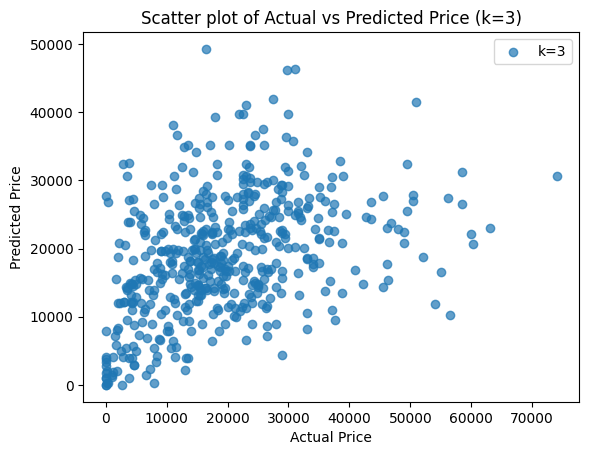

mean squared error: 117399126.10604002


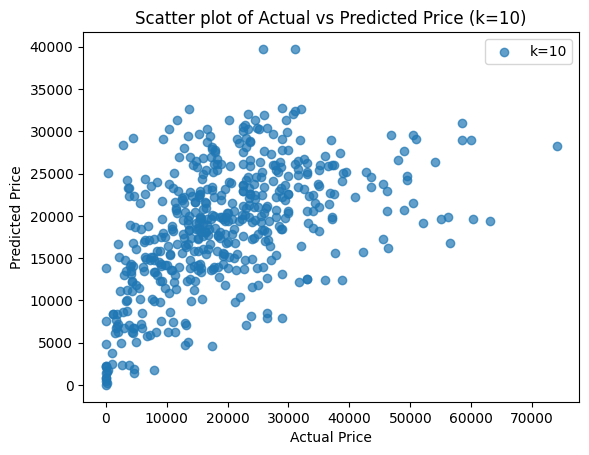

mean squared error: 112576160.82390079


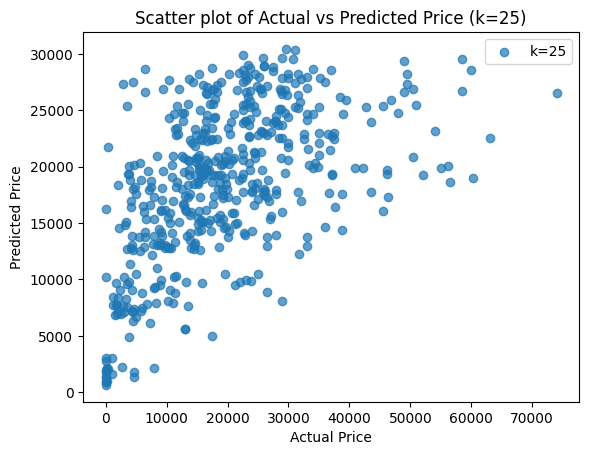

mean squared error: 110202549.3014296


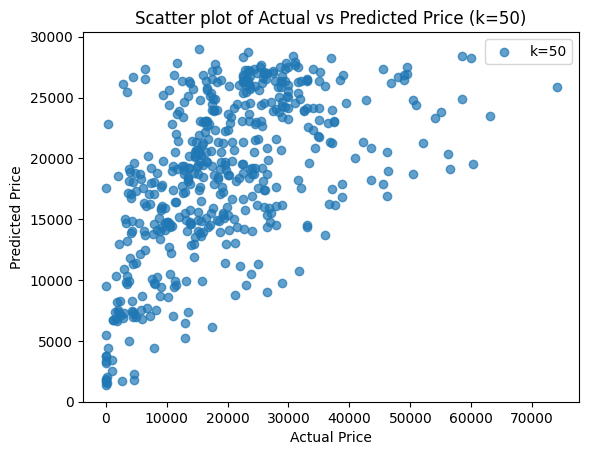

mean squared error: 112253702.9700672


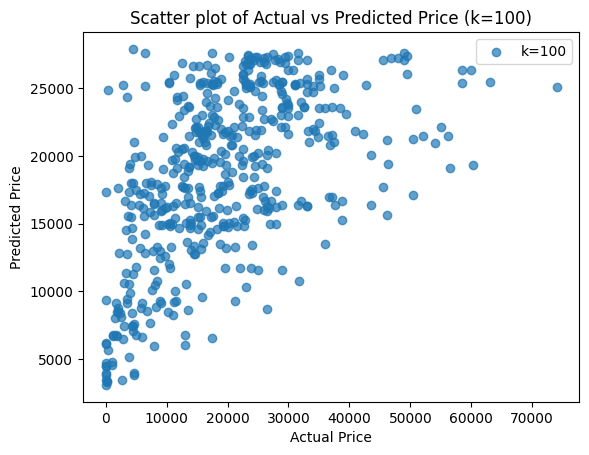

mean squared error: 114496092.28682345


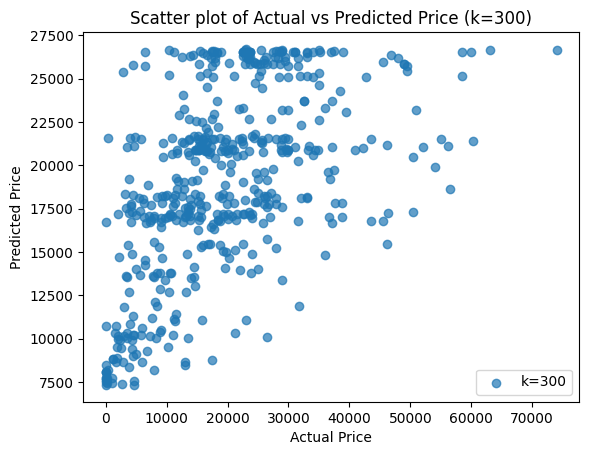

In [13]:
#4
k_values = [3, 10, 25, 50, 100, 300]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    #mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print ("mean squared error:", mse)

    # scatter plot actual vs predicted prices
    plt.scatter(y_test, y_pred, alpha=0.7, label=f'k={k}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Scatter plot of Actual vs Predicted Price (k={k})')
    plt.legend()
    plt.show()

When k is smaller there is more noisy prediction with less datapoints and therefore more scattered. As it gets larger, the predictions are smoother. Mean squared error also fluctuates.

In [14]:
#5
from sklearn.model_selection import cross_val_score
import numpy as np
k_values = [3, 10, 25, 50, 100, 300]
mse_values = []

In [17]:
#5
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    mse_scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_values.append(np.mean(-mse_scores))  #cross_val_score returns negative values

for k, mse in zip(k_values, mse_values):
    print(f"Mean Squared Error for k={k}: {mse}")

# finding k with the minimum MSE
optimal_k = k_values[np.argmin(mse_values)]
print(f"The optimal k is:", optimal_k)

Mean Squared Error for k=3: 146132909.49779704
Mean Squared Error for k=10: 117824974.5753365
Mean Squared Error for k=25: 112329891.28936617
Mean Squared Error for k=50: 110423065.4126035
Mean Squared Error for k=100: 111567075.46245074
Mean Squared Error for k=300: 113236005.86496797
The optimal k is: 50


6.
With smaller values of k, there is more sensitivity to individual datapoints with generalization leading to overfitting, and predicted values match actual values. With larger values, the model smooths out predictions yet also may underfit the data as the model may be too simplistic. The optimal value of k, 50, is the balance between overfitting and underfitting where the model has underlying patterns in the data while avoiding noise to outliers.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [21]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("zoo.csv")

for class_label in df['class'].unique():
    print(f"\nClass {class_label}:")
    print(df[df['class'] == class_label])



Class 1:
      animal  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0   aardvark     1         0     0     1         0        0         1   
1   antelope     1         0     0     1         0        0         0   
3       bear     1         0     0     1         0        0         1   
4       boar     1         0     0     1         0        0         1   
5    buffalo     1         0     0     1         0        0         0   
6       calf     1         0     0     1         0        0         0   
9       cavy     1         0     0     1         0        0         0   
10   cheetah     1         0     0     1         0        0         1   
17      deer     1         0     0     1         0        0         0   
19   dolphin     0         0     0     1         0        1         1   
22  elephant     1         0     0     1         0        0         0   
27  fruitbat     1         0     0     1         1        0         0   
28   giraffe     1         0     0     1 

In [22]:
#1 EDA:
print("Missing values:")
print(df.isna().sum())
print("Summary statistics:")
print(df.describe())

Missing values:
animal      0
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
class       0
dtype: int64
Summary statistics:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.0000

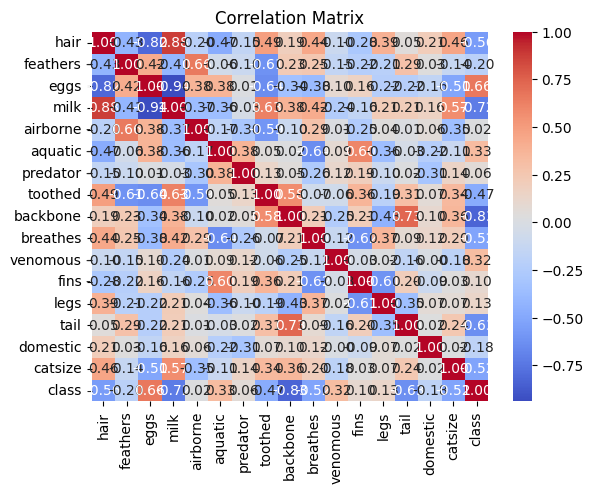

In [24]:
#1 correlation
correlation_matrix = df.select_dtypes(include=['number']).corr() # to only include numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

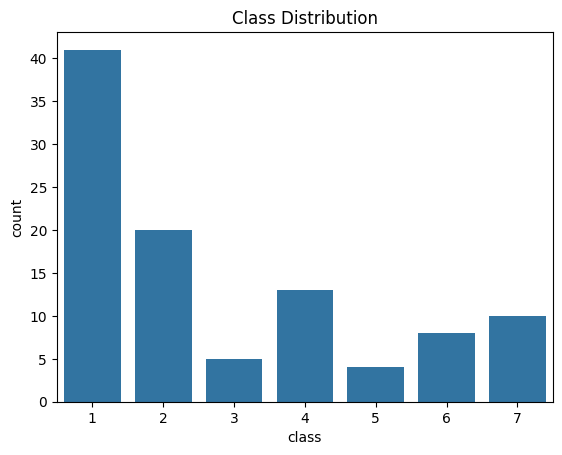

In [27]:
#1 class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()



In [29]:
#1 variation
numeric_features = df.select_dtypes(include=['number']).drop('class', axis=1)
feature_variance = numeric_features.var()
print("Feature variance:")
print(feature_variance.sort_values(ascending=False))

Feature variance:


In [30]:
#2
from sklearn.model_selection import train_test_split
df = df.drop(columns=['animal']) #since animal is a name not a feature

X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

#shape of dataset
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

#class distribution:
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))
print("Class distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set size: 50 samples
Test set size: 51 samples
Class distribution in training set:
class
1    0.40
2    0.20
4    0.12
7    0.10
6    0.08
3    0.06
5    0.04
Name: proportion, dtype: float64
Class distribution in test set:
class
1    0.411765
2    0.196078
4    0.137255
7    0.098039
6    0.078431
5    0.039216
3    0.039216
Name: proportion, dtype: float64


In [31]:
#3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

k_values = range(1, 51)  # k from 1 to 50
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

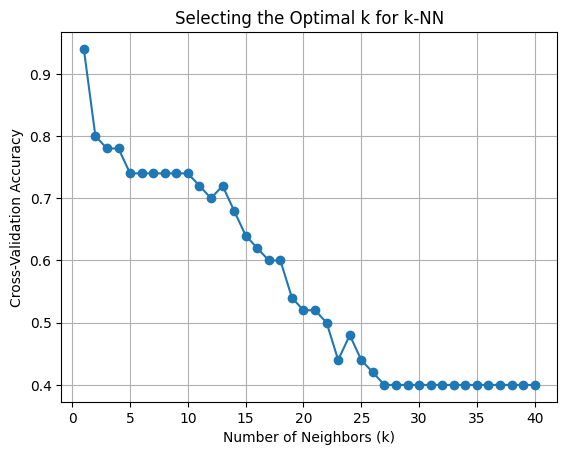

In [33]:
#3
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Selecting the Optimal k for k-NN')
plt.grid()
plt.show()

In [35]:
#3
optimal_k = k_values[np.argmax(cv_scores)]
optimal_k

41

3: to choose k, I used 5-fold cross validation to estimate accuracy for k to reduce overfitting and underfitting. To choose the optimal k, I selected one that yields the highest cross-valudation accuracy using np.armax(cv_scores)

In [36]:
#4
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


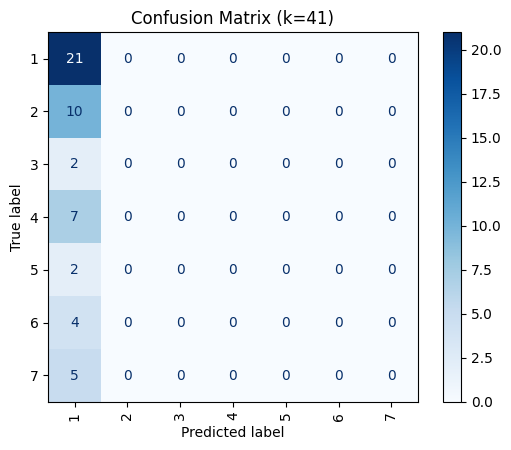

Test Set Accuracy: 41.18%


In [37]:
#4
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title(f"Confusion Matrix (k={optimal_k})")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2%}")


In [38]:
#4
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[f"Class {c}" for c in sorted(y.unique())]))


Classification Report:
              precision    recall  f1-score   support

     Class 1       0.41      1.00      0.58        21
     Class 2       0.00      0.00      0.00        10
     Class 3       0.00      0.00      0.00         2
     Class 4       0.00      0.00      0.00         7
     Class 5       0.00      0.00      0.00         2
     Class 6       0.00      0.00      0.00         4
     Class 7       0.00      0.00      0.00         5

    accuracy                           0.41        51
   macro avg       0.06      0.14      0.08        51
weighted avg       0.17      0.41      0.24        51



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
#5
X_train_subset = X_train[['milk', 'aquatic', 'airborne']]
X_test_subset = X_test[['milk', 'aquatic', 'airborne']]

knn_subset = KNeighborsClassifier(n_neighbors=optimal_k)
knn_subset.fit(X_train_subset, y_train)
y_pred_subset = knn_subset.predict(X_test_subset)


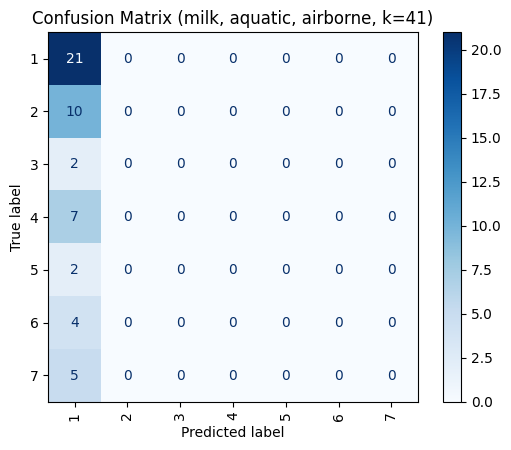

Test Set Accuracy (Subset Features): 41.18%


In [44]:
#5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

conf_matrix_subset = confusion_matrix(y_test, y_pred_subset)
disp_subset = ConfusionMatrixDisplay(conf_matrix_subset, display_labels=sorted(y.unique()))
disp_subset.plot(cmap='Blues', xticks_rotation='vertical')
plt.title(f"Confusion Matrix (milk, aquatic, airborne, k={optimal_k})")
plt.show()

accuracy_subset = accuracy_score(y_test, y_pred_subset)
print(f"Test Set Accuracy (Subset Features): {accuracy_subset:.2%}")


In [45]:
#5
y_proba_subset = knn_subset.predict_proba(X_test_subset.values)

print("Predicted Class Probabilities (First 5 Samples):")
print(y_proba_subset[:5])

print("Classes Represented in Predictions:")
print(knn_subset.classes_)


Predicted Class Probabilities (First 5 Samples):
[[0.36585366 0.17073171 0.07317073 0.14634146 0.04878049 0.07317073
  0.12195122]
 [0.48780488 0.14634146 0.07317073 0.09756098 0.02439024 0.04878049
  0.12195122]
 [0.48780488 0.14634146 0.07317073 0.09756098 0.02439024 0.04878049
  0.12195122]
 [0.48780488 0.14634146 0.07317073 0.09756098 0.02439024 0.04878049
  0.12195122]
 [0.31707317 0.24390244 0.07317073 0.12195122 0.04878049 0.09756098
  0.09756098]]
Classes Represented in Predictions:
[1 2 3 4 5 6 7]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


5: Using only milk, aquatic, and airborne reduces the model’s ability to distinguish between classes that rely on other features like feathers, eggs, or legs. As a result, certain classes might never be predicted because their distinguishing characteristics are missing. Some classes disappear because three features may not showcase the complexity needed for all seven classes. Also with the nearest neighbor, multiple classes might cluster together in feature space.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [46]:
#1
import pandas as pd
df = pd.read_csv("college_completion.csv")

In [47]:
#2
print("Dataset Dimensions:", df.shape)
print("Number of Observations:", df.shape[0])
print("Variables Included:", df.columns.tolist())

print("\nFirst Five Rows of Data:")
print(df.head())


Dataset Dimensions: (3798, 63)
Number of Observations: 3798
Variables Included: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_tr

In [48]:
#3
cross_tab = pd.crosstab(df['control'], df['level'], margins=True, margins_name="Total")
print(cross_tab)

level                   2-year  4-year  Total
control                                      
Private for-profit         465     527    992
Private not-for-profit      68    1180   1248
Public                     926     632   1558
Total                     1459    2339   3798


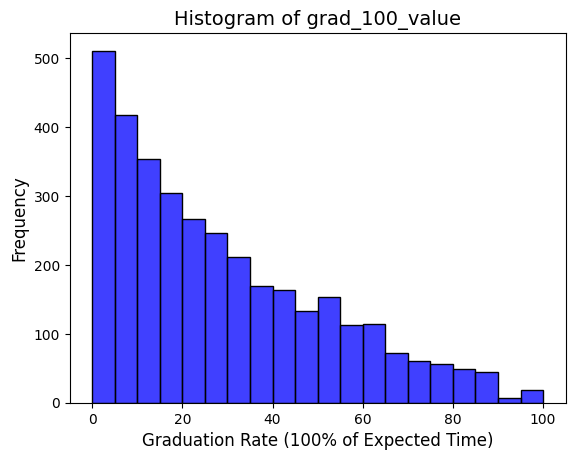

In [49]:
#4
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['grad_100_value'], bins=20, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of grad_100_value')
plt.xlabel('Graduation Rate (100% of Expected Time)')
plt.ylabel('Frequency')
plt.show()


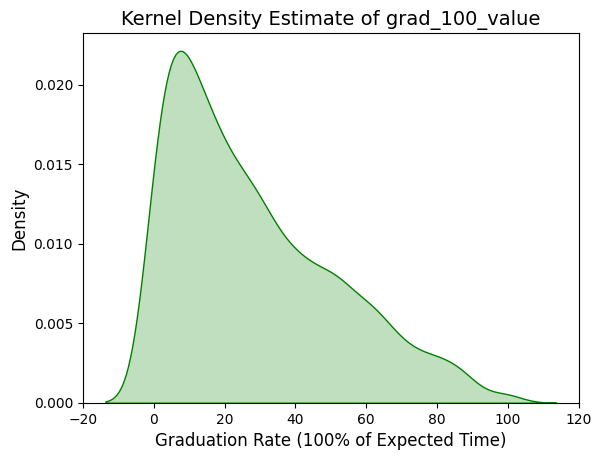

In [51]:
#4
sns.kdeplot(df['grad_100_value'], fill=True, color='green')
plt.title('Kernel Density Estimate of grad_100_value')
plt.xlabel('Graduation Rate (100% of Expected Time)')
plt.ylabel('Density')
plt.show()


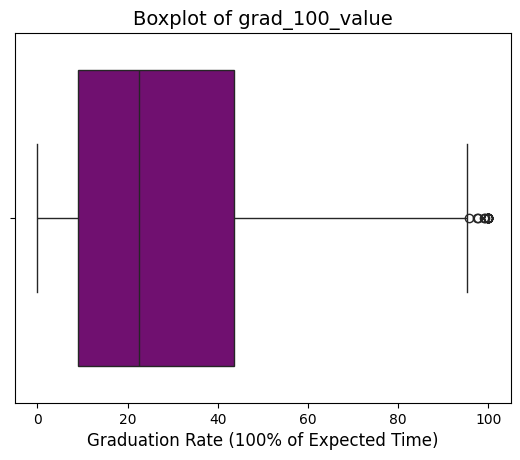

In [52]:
#4
sns.boxplot(x=df['grad_100_value'], color='purple')
plt.title('Boxplot of grad_100_value')
plt.xlabel('Graduation Rate (100% of Expected Time)')
plt.show()

In [53]:
#4
print("Statistical Description of grad_100_value:")
print(df['grad_100_value'].describe())

Statistical Description of grad_100_value:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


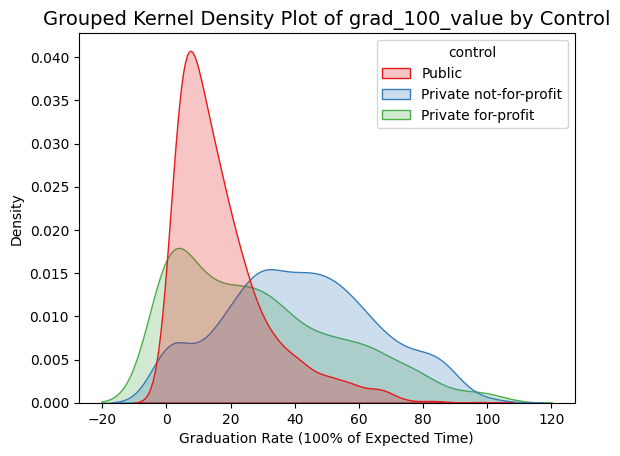

In [55]:
#5
#grouping data by 'control' and plot KDE for each category
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True, common_norm=False, palette='Set1')
plt.title('Grouped Kernel Density Plot of grad_100_value by Control', fontsize=14)
plt.xlabel('Graduation Rate (100% of Expected Time)')
plt.ylabel('Density')
plt.show()


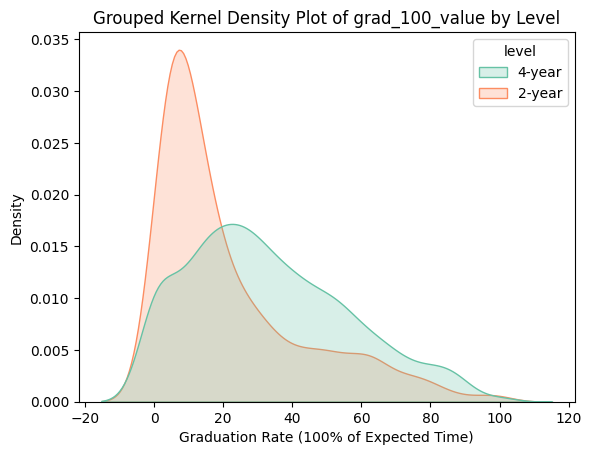

In [56]:
#5
# grouping data by 'level' and plot KDE for each category
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True, common_norm=False, palette='Set2')
plt.title('Grouped Kernel Density Plot of grad_100_value by Level')
plt.xlabel('Graduation Rate (100% of Expected Time)')
plt.ylabel('Density')
plt.show()


In [57]:
#5
control_group_desc = df.groupby('control')['grad_100_value'].describe()
print("Statistical Description of grad_100_value by Control:")
print(control_group_desc)

level_group_desc = df.groupby('level')['grad_100_value'].describe()
print("Statistical Description of grad_100_value by Level:")
print(level_group_desc)


Statistical Description of grad_100_value by Control:
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  
Statistical Description of grad_100_value by Level:
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


5: Private for profit schools and 4 year institutions appear to have the highest graduation rates (and private not for profit has very similar graduation rates to private for profit according to the kernal density plot)

In [58]:
#6
df['levelXcontrol'] = df['level'] + ', ' + df['control']
print(df[['level', 'control', 'levelXcontrol']].head())


    level                 control                   levelXcontrol
0  4-year                  Public                  4-year, Public
1  4-year                  Public                  4-year, Public
2  4-year  Private not-for-profit  4-year, Private not-for-profit
3  4-year                  Public                  4-year, Public
4  4-year                  Public                  4-year, Public


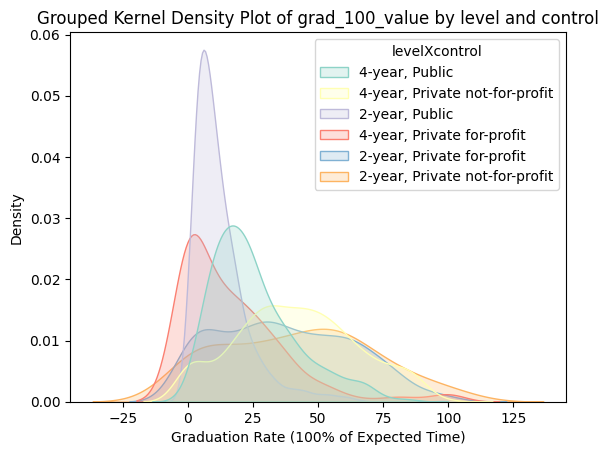

In [59]:
#6
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True, common_norm=False, palette='Set3')
plt.title('Grouped Kernel Density Plot of grad_100_value by level and control')
plt.xlabel('Graduation Rate (100% of Expected Time)')
plt.ylabel('Density')
plt.show()


6: it appears that 4 year private schools and 2 year private not for profit schools have the hightest graduation rates

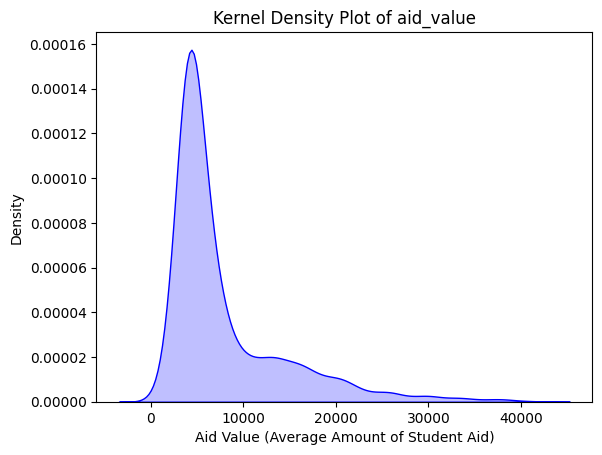

In [60]:
#7
sns.kdeplot(df['aid_value'], fill=True, color='blue')
plt.title('Kernel Density Plot of aid_value')
plt.xlabel('Aid Value (Average Amount of Student Aid)')
plt.ylabel('Density')
plt.show()


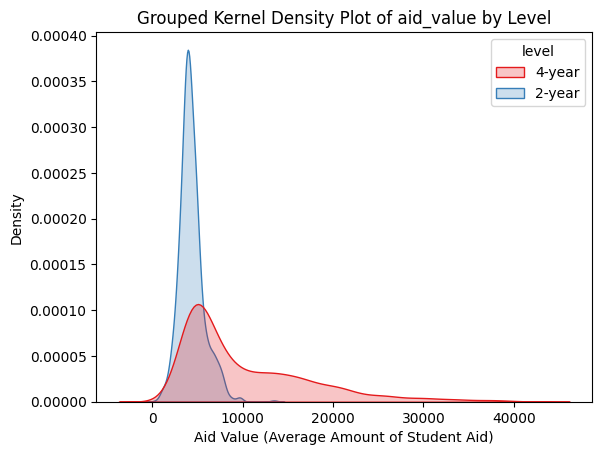

In [61]:
#7
sns.kdeplot(data=df, x='aid_value', hue='level', fill=True, common_norm=False, palette='Set1')
plt.title('Grouped Kernel Density Plot of aid_value by Level')
plt.xlabel('Aid Value (Average Amount of Student Aid)')
plt.ylabel('Density')
plt.show()



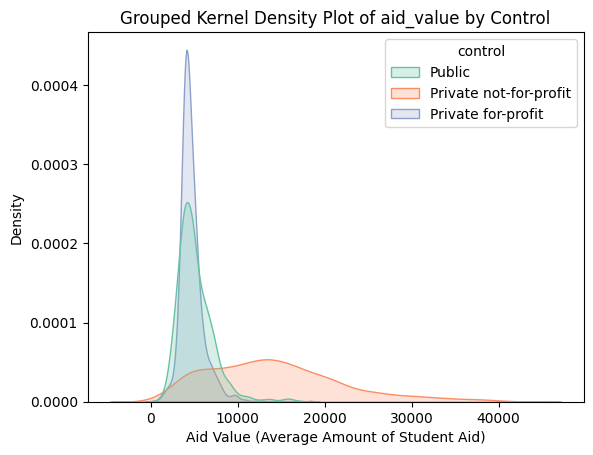

In [62]:
#7
sns.kdeplot(data=df, x='aid_value', hue='control', fill=True, common_norm=False, palette='Set2')
plt.title('Grouped Kernel Density Plot of aid_value by Control')
plt.xlabel('Aid Value (Average Amount of Student Aid)')
plt.ylabel('Density')
plt.show()

In [64]:
#7
level_group_desc = df.groupby('level')['aid_value'].describe()
print(level_group_desc)
control_group_desc = df.groupby('control')['aid_value'].describe()
print(control_group_desc)



         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  
                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   

7: shape of the graph is determined by how much financial aid is distributed across institutions, with private not for profit institutions offering the highest aid values.

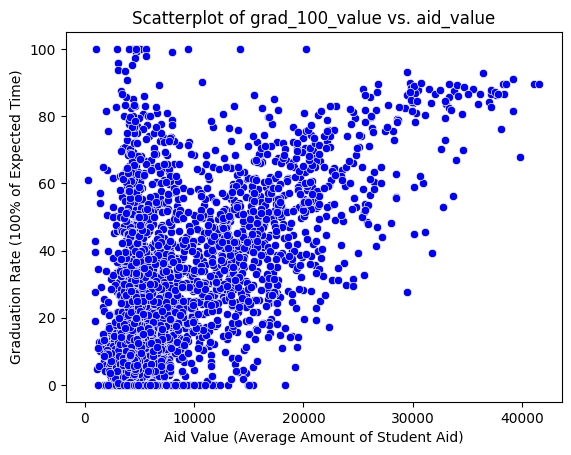

In [65]:
#8
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'], color='blue')
plt.title('Scatterplot of grad_100_value vs. aid_value')
plt.xlabel('Aid Value (Average Amount of Student Aid)')
plt.ylabel('Graduation Rate (100% of Expected Time)')
plt.show()

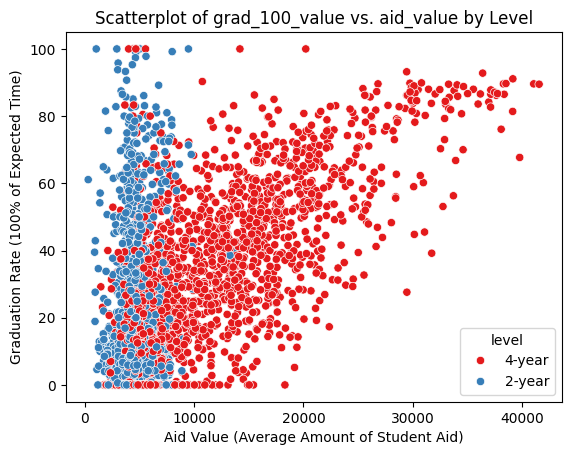

In [66]:
#8
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'], hue=df['level'], palette='Set1')
plt.title('Scatterplot of grad_100_value vs. aid_value by Level')
plt.xlabel('Aid Value (Average Amount of Student Aid)')
plt.ylabel('Graduation Rate (100% of Expected Time)')
plt.show()


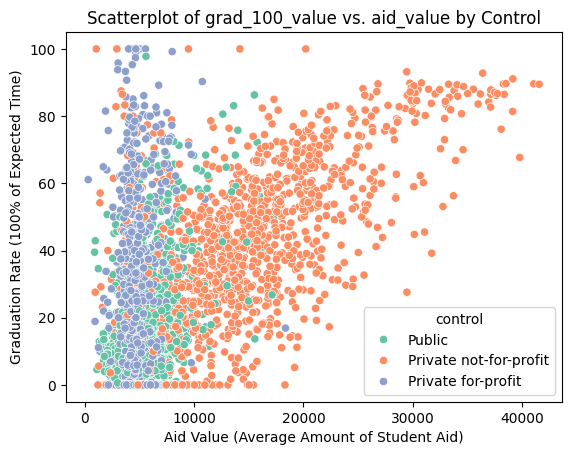

In [67]:
#8
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'], hue=df['control'], palette='Set2')
plt.title('Scatterplot of grad_100_value vs. aid_value by Control')
plt.xlabel('Aid Value (Average Amount of Student Aid)')
plt.ylabel('Graduation Rate (100% of Expected Time)')
plt.show()


8: 4 year institutions and private not for profit institutions is where the data indicates that aid increases graduation rates